In [3]:
roots = ["cat", "bat", "rat"]
sentence = "the cattle was rattled by the battery"


def replace_words(roots, sentence):
    words = sentence.split(" ")

    # looping over each word
    for index, word in enumerate(words):
        if word[:3] in roots:
            words[index] = word[:3]
                
    return " ".join(words)


replace_words(roots, sentence)

'the cat was rat by the bat'

In [4]:
import re

def is_palindrome(text):
    text = text.lower()

    # Cleaning the string
    rx = re.compile('\W+')
    text = rx.sub('',text).strip()

    reverse_text = text[::-1]
    # Reversing and comparing the string
    return text == text[::-1]


List = ['Anna', '**Radar****','Abid','(Level)', 'Data']

for text in List:
    print(f"Is {text} a palindrome? {is_palindrome(text)}")


Is Anna a palindrome? True
Is **Radar**** a palindrome? True
Is Abid a palindrome? False
Is (Level) a palindrome? True
Is Data a palindrome? False


In [6]:
X = [1,5,9,0] 
Y = [3,0,2,9]

intersection = [x for x in X if x in Y]
intersection

[9, 0]

In [8]:
D = [1,2,3,1,3,6,5]
D = list(set(D))
D

[1, 2, 3, 5, 6]

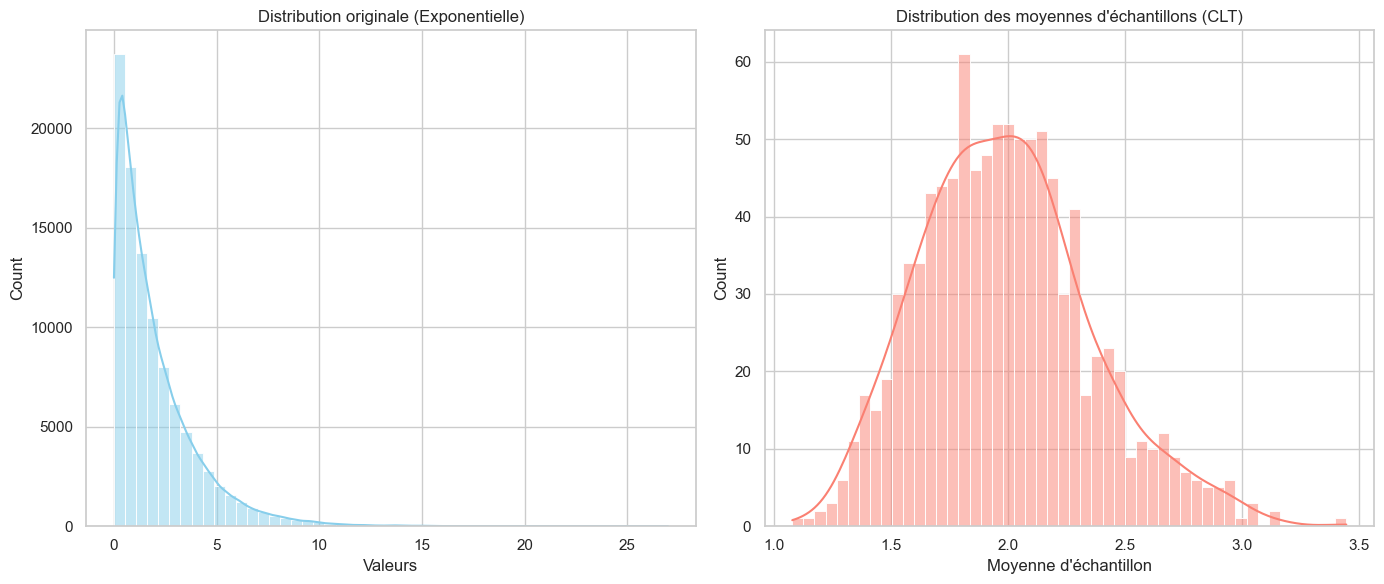

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour un affichage plus joli
sns.set(style="whitegrid")

# 1. Générer une population non normale (exponentielle)
population = np.random.exponential(scale=2, size=100000)

# 2. Fonction pour simuler des moyennes d'échantillons
def sample_means(population, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size)
        means.append(np.mean(sample))
    return means

# 3. Paramètres d’échantillonnage
sample_size = 30     # taille d’un échantillon
num_samples = 1000   # nombre d’échantillons

# 4. Moyennes d’échantillons
means = sample_means(population, sample_size, num_samples)

# 5. Visualisation
plt.figure(figsize=(14, 6))

# Histogramme de la population originale (non normale)
plt.subplot(1, 2, 1)
sns.histplot(population, bins=50, kde=True, color='skyblue')
plt.title("Distribution originale (Exponentielle)")
plt.xlabel("Valeurs")

# Histogramme des moyennes d’échantillons (normalisé selon CLT)
plt.subplot(1, 2, 2)
sns.histplot(means, bins=50, kde=True, color='salmon')
plt.title("Distribution des moyennes d'échantillons (CLT)")
plt.xlabel("Moyenne d'échantillon")

plt.tight_layout()
plt.show()


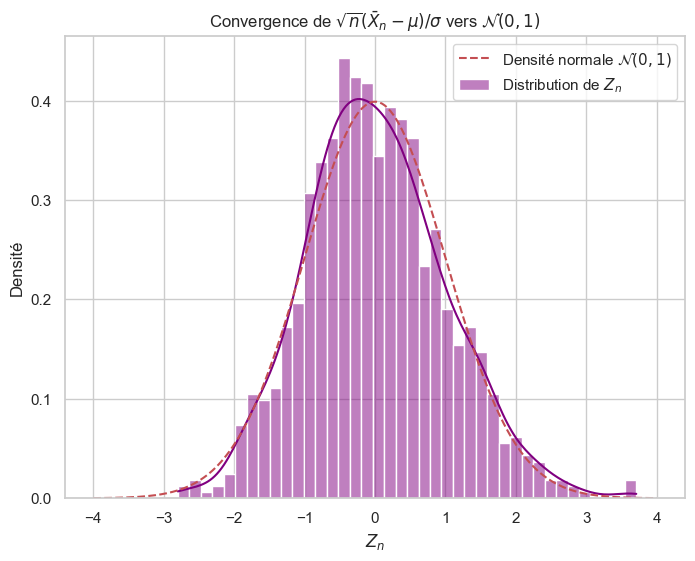

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set(style="whitegrid")

# Population : distribution exponentielle (non normale)
population = np.random.exponential(scale=2, size=100000)
mu = np.mean(population)        # moyenne vraie de la population
sigma = np.std(population)      # écart-type de la population

n = 50       # taille de l'échantillon
num_samples = 1000  # nombre d'échantillons

Z_n = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=n)
    x_bar = np.mean(sample)
    # calcul de sqrt(n) * (x_bar - mu) / sigma
    z = np.sqrt(n) * (x_bar - mu) / sigma
    Z_n.append(z)

# Visualisation
plt.figure(figsize=(8, 6))
sns.histplot(Z_n, bins=40, kde=True, color='purple', stat="density", label='Distribution de $Z_n$')

# Ajouter la densité normale standard pour comparaison
x = np.linspace(-4, 4, 200)
plt.plot(x, norm.pdf(x), 'r--', label='Densité normale $\mathcal{N}(0,1)$')

plt.title(r"Convergence de $\sqrt{n}(\bar{X}_n - \mu)/\sigma$ vers $\mathcal{N}(0,1)$")
plt.xlabel("$Z_n$")
plt.ylabel("Densité")
plt.legend()
plt.show()
